# Exercise 1 notebook B

The submission deadline is **25.11.2024 23:55.**

Please write your own student_id in the same format as in the example (especially using the same variable name) where it says "YOUR CODE HERE".

In [1]:
#
# <<< INSERT CODE HERE >>>
#

# Please enter your student ID here
student_id = 11912007

## Task Description    
    
This is the second part of the exercise. For better comparability, please load our prepared data for solving this exercise and do not use the dataset that you created in Part 1A.

The goal of this exercise is to train a machine learning (ML) model on the data we prepared in the first notebook. The goal of the model is to predict the type of disruption (`disruption`) given the features (all other columns, like temperature etc.).

First we will visualize the data to get a better understanding, then we will identify suitable machine learning methods and train a model.
Finally we will test the trained ML model on a holdout test dataset.

Out of the total 100 points, this notebook makes up for 45 points.

**Notebook A (data preparation), 55 points:**
 - Task 1: 20 points
 - Task 2: 15 points
 - Task 3: 10 points
 - Task 4: 5 points
 - Task 5: 5 points

**Notebook B (this notebook), 45 points:**
 - Task 6: 15 points (Visualization)
 - Task 7: 25 points (Train models)
 - Task 8: 5 points (Test models)

## Setup Python and load data
Import necessary Python modules and load the preprocessed data from the shared folder.

### Add imports

In [2]:
# Note: Use only the libraries below. You can import members (e.g. functions) from these libraries in your code.

import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn

import typing

### Load data
Load the preprocessed data from the shared folder: 

In [3]:
with open(os.path.join(os.environ["HOME"], "shared", "188.995-2024W", "data", "data_processed.pickle"),"rb") as fp:
     data_processed = pickle.load(fp)

As you know from the previous exercise, our data is not in a good state and needs some cleaning. Same holds true in this case. In the disruption column we have different descriptions meaning the same thing. With the following code we can group these things together to get a much clearer picture:

In [4]:
# mapping dictionary

mapping = {
    'Polizeieinsatz': 'Operation',
    'Rettungseinsatz': 'Operation',
    'Polizeieinsatz Verspätungen': 'Operation',
    'Feuerwehreinsatz': 'Operation',
    'Rettungseinsatz Verspätungen': 'Operation',
    'Schadhaftes Fahrzeug': 'Vehicle in poor condition',
    'Schadhaftes Fahrzeug Verspätungen': 'Vehicle in poor condition',
    'Wagengebrechen': 'Vehicle in poor condition',
    'Schadhafter Zug': 'Vehicle in poor condition',
    'Fahrzeug Verspätungen': 'Vehicle in poor condition',
    'Fahrzeug': 'Vehicle in poor condition',
    'erhöhtes Fahrgastaufkommen': 'Increased passenger volume',
    'Erhöhtes Fahrgastaufkommen': 'Increased passenger volume',
    'erhöhtes Fahrgastaufkommen Verspätungen': 'Increased passenger volume',
    'Verspätungen': 'Delay',
    'Verspätung': 'Delay',
    'Verkehrsunfall Verspätungen': 'Traffic accident',
    'Verkehrsunfall': 'Traffic accident',
    'Fremder Verkehrsunfall': 'Traffic accident',
    'Fremder Verkehrsunfall Verspätungen': 'Traffic accident',
    'Verkehrsstörung Verspätungen': 'Traffic jam',
    'Verkehrsstörung': 'Traffic jam',
    'Verkehrsbedingte Verspätung': 'Traffic jam',
    'Verkehrsbedingte ': 'Traffic jam',
    'Verkehrsbedingte Verspätungen': 'Traffic jam',
    'Verkehrsbedingt': 'Traffic jam',
    'Verkehrsbedingt Verspätungen': 'Traffic jam',
    'Verkehrsbedingte Verspätung Verspätungenen': 'Traffic jam',
    'Verkehrsbedingte Verspätung Verspätungen': 'Traffic jam',
    'Veranstaltung': 'Event',
    'Vienna': 'Event',
    'Vienna-City-Marathon': 'Event',
    'Regenbogenparade': 'Event',
    'Demonstration': 'Event',
    'Staatsbesuch': 'Event',
    'Opernball': 'Event',
    'Erkrankung eines Fahrgastes': 'Personnel problems',
    'Erkrankung eines': 'Personnel problems',
    'Erkrankung': 'Personnel problems',
    'Fahrleitungsgebrechen': 'General infrastructure',
    'Wasserrohrgebrechen': 'General infrastructure',
    'Stromstörung': 'General infrastructure',
    'Gasrohrgebrechen': 'General infrastructure',
    'Gleisschaden': 'Transportation infrastructure',
    'Weichenstörung': 'Transportation infrastructure',
    'Gleisbauarbeiten': 'Transportation infrastructure',
    'Signalstörung': 'Transportation infrastructure',
    'Signalstörung Verspätungen': 'Transportation infrastructure',
    'Stellwerkstörung': 'Transportation infrastructure',
    'Betriebsstörung': 'Operational disruption',
    'Betriebseinstellung': 'Operational disruption',
    'Fahrtbehinderung': 'Maliciousness',
    'Sachbeschädigung': 'Maliciousness',
    'Falschparker': 'Maliciousness',
    'Witterungsbedingt': 'Weather',
    'Sturmschaden': 'Weather',
    'Bauarbeiten': 'Construction work',
    'Umleitung': 'Construction work',
    'Verunreinigung': 'Contamination'
}

# Use the replace method to update the column
data_processed['disruption'] = data_processed['disruption'].replace(mapping)

Now transform the values from your target column `disruption` and save the new values in the new column `class`.

In [5]:
#
# <<< INSERT CODE HERE >>>
#

from sklearn.preprocessing import LabelEncoder

target_column = "disruption"
data_processed["class"] = data_processed[target_column]

In [6]:
assert data_processed['class'].nunique() == 15, "There should be 15 classes"

In [7]:
assert data_processed.shape[0] > 66000, "there should be more than 66000 rows in the merged dataset"
assert data_processed.shape[1] >= 17, "5 columns for disruptions, 11 feature columns, 1 class column"

assert not data_processed.isna().any().any(), "All missing values should be eliminated!"
assert not data_processed['disruption'].isna().any(), "The dataframe must have a disruption column!"
assert not data_processed['bus'].isna().any(), "The dataframe must have a bus column!"
assert not data_processed['subway'].isna().any(), "The dataframe must have a subway column!"
assert not data_processed['tram'].isna().any(), "The dataframe must have a tram column!"
assert not data_processed['duration'].isna().any(), "The dataframe must have a duration column!"

In [8]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


## Task 6: Visualization (15 Poins)

To better understand the dataset, create visualizations of the merged data using `pandas`, `matplotlib` or `seaborn` that help explore potential relationships between the variables before developing a model.
We are particularly interested in the relationships of the variable to be modeled (`disruptions`) with the other columns (later features).

- Make at least **3 different plots**: use **2 different plot types** and **2 different libraries**
- Use proper labeling: include title, axis labels, legends, ... . Your plots should present information clearly! -> http://imgs.xkcd.com/comics/convincing.png. 

**Note:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions without understanding and justification.


To gain valuable insights on the data, you might wanna look at the overall development over time, have a closer look at one specific year (e.g. 2021) or compare different years. For a better overview, you could also plot the top n most frequently occurring disruptions in more detail or their occurencies over the year. 
We want you to get good insights into the dataset, therefore please explore the dataset in depth, try different visualization libraries and do not only use the visualizations described by us.

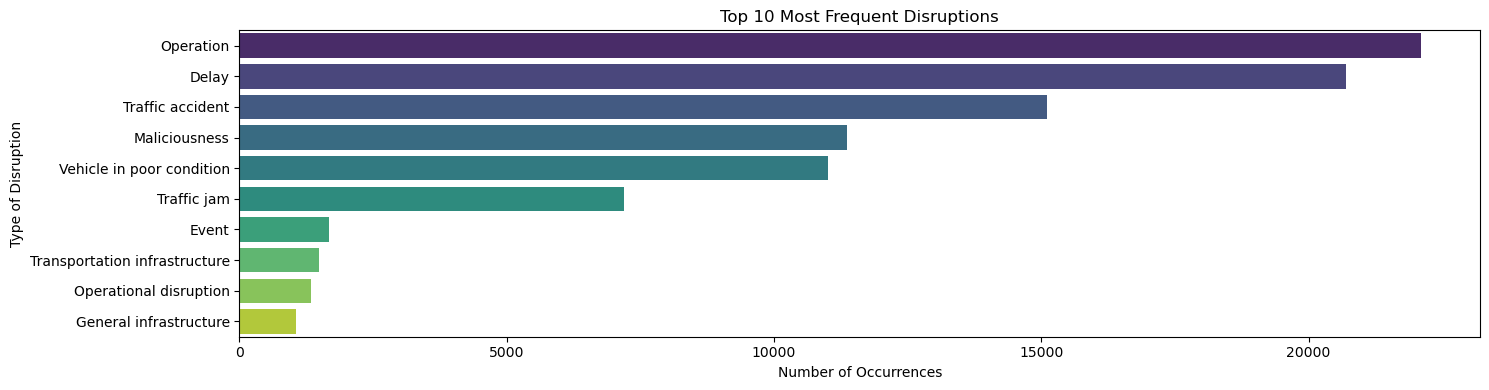

<Figure size 1500x400 with 0 Axes>

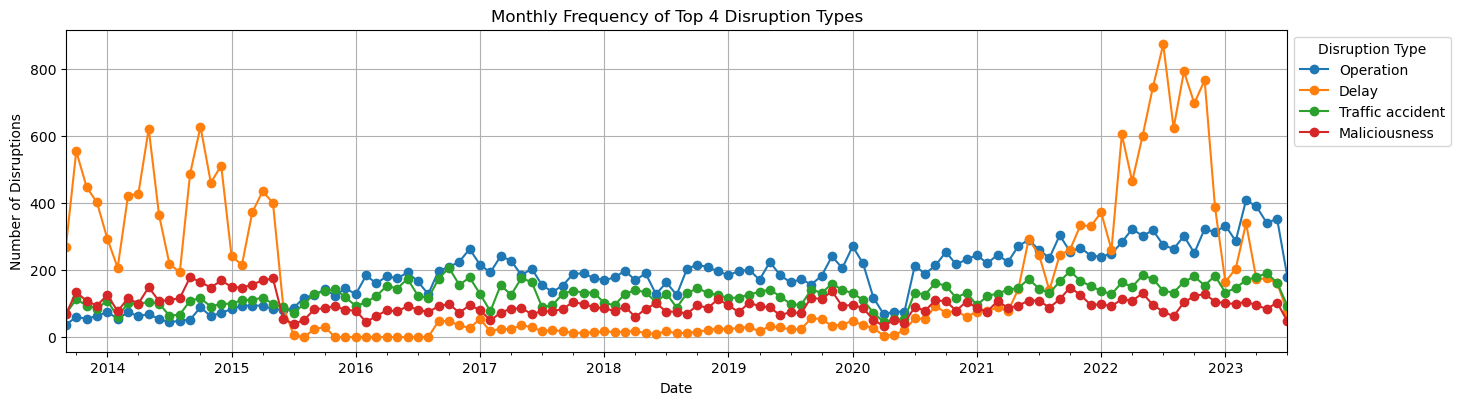

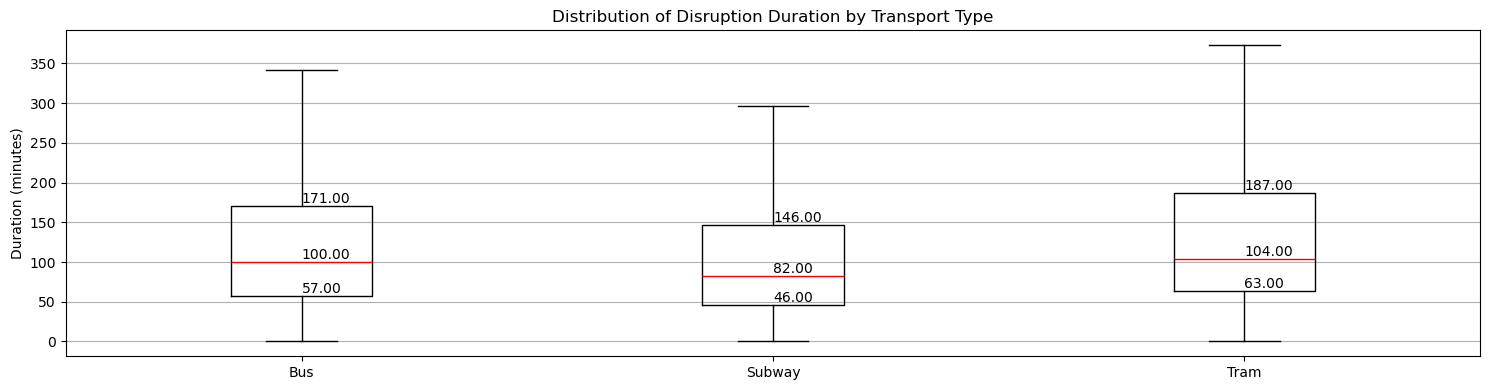

In [9]:
#
# <<< INSERT CODE HERE >>>
#

df = data_processed.copy()

# freq bar plot
plt.figure(figsize=(15, 4))
disruption_counts = df["disruption"].value_counts().head(10)
sns.barplot(x=disruption_counts.values, y=disruption_counts.index, palette="viridis", hue=disruption_counts.index)
plt.title("Top 10 Most Frequent Disruptions")
plt.xlabel("Number of Occurrences")
plt.ylabel("Type of Disruption")
plt.tight_layout()
plt.show()

# disruptions@4 time series
plt.figure(figsize=(15, 4))
df.index = pd.to_datetime(df.index.map(lambda x: f"{x[0]}-{x[1]}-{x[2]}"))  # datetime instead of multiindex for time series
df_monthly = df.groupby([pd.Grouper(freq="ME"), "disruption"]).size().unstack(fill_value=0)
df_monthly[["Operation", "Delay", "Traffic accident", "Maliciousness"]].plot(marker="o")
plt.title("Monthly Frequency of Top 4 Disruption Types")
plt.xlabel("Date")
plt.ylabel("Number of Disruptions")
plt.legend(title="Disruption Type", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.gcf().set_size_inches(20, 4)
plt.show()

# duration by transport type vs. disruption boxplot
plt.figure(figsize=(15, 4))
df["duration_minutes"] = df["duration"].dt.total_seconds() / 60
transport_types = ["bus", "subway", "tram"]
data = []
labels = []
for transport in transport_types:
    mask = df[transport]
    data.append(df[mask]["duration_minutes"])
    labels.append(f"{transport.capitalize()}")
plt.boxplot(data, tick_labels=labels, showfliers=False, patch_artist=False, medianprops={"color": "red"})
for i in range(len(data)):
    plt.text(i + 1, np.percentile(data[i], 50), f"{np.percentile(data[i], 50):.2f}", ha="left", va="bottom", color="black")
    plt.text(i + 1, np.percentile(data[i], 75), f"{np.percentile(data[i], 75):.2f}", ha="left", va="bottom", color="black")
    plt.text(i + 1, np.percentile(data[i], 25), f"{np.percentile(data[i], 25):.2f}", ha="left", va="bottom", color="black")
plt.title("Distribution of Disruption Duration by Transport Type")
plt.ylabel("Duration (minutes)")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

In [10]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

# Classification models

## Task 7: Model for disruption class prediction (25 Points)

Build and train a model using weather and traffic data from 2013 until 2023 (incl.) using `scikit-learn`.

You have to do the following steps:

1. Create train, validation, and test splits - **2**
1. First ML experiments - **2**
1. Explore the different metrics - **3**
1. Explore different scaling approaches - **3**
1. Experiment with different train/valid splits - **3**
1. Experiment with different feature selection methods - **3**
1. Try out different ML algorithms - **3**
1. Explore the effect of parameters with 10-fold cross-validation - **3**
1. Present your best performing results - **3**

General advices: Make sure your results are reproducible. You can use your student ID as seed.

### 7.1 Create train, validation, and test splits

First, we need to create a dataset that will be used to train a model. 

Due to performance reasons we only use a fraction of the overall data set for our computations.

In [11]:
#
# <<< INSERT CODE HERE >>>
#

import random

seed = student_id
random.seed(seed)
np.random.seed(seed)


def sample_data(df: pd.DataFrame, fraction: float = 0.7) -> pd.DataFrame:
    """
    Sample a fraction of the data.
    """
    data_shortened = df.copy()
    data_shortened = data_shortened.sample(frac=fraction, random_state=seed)

    # we drop disruption since it is mapped to our new target variable 'class'
    data_shortened = data_shortened.drop(columns=["disruption"])
    # Convert entries in the `duration` column from `Timedelta` to floating-point number `numpy.float64`, so that this column can be also used as a feature to train a classifier:
    data_shortened["duration"] = (data_shortened["duration"] - data_shortened["duration"].min()) / np.timedelta64(1, "D")
    return data_shortened


len_before = len(data_processed)
data_shortened = sample_data(data_processed)
data_shortened.head()

assert (len(data_shortened) < len_before) and (len_before * 0.7 < len(data_shortened))

In [12]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Split the `data_shortened` DataFrame into train (this will be further split to train and validation) and test sets.
- Train & validation set: 80% of the overall data set
- Test set: remaining 20% of the data

In [13]:
#
# <<< INSERT CODE HERE >>>
#

from sklearn.model_selection import train_test_split


def split_data(df: pd.DataFrame, test_size: float = 0.2, target_column: str = "class") -> typing.Tuple[pd.DataFrame, pd.DataFrame]:
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=seed)
    return df_train, df_test

In [14]:
data_train, data_test = split_data(data_shortened)

In [15]:
assert data_train.shape[1] == data_test.shape[1], "Both dataframes should have the same number of columns!!"
assert data_train.shape[1] == data_shortened.shape[1], "All columns should be retained!!"
assert data_train.shape[0] < data_shortened.shape[0], "data_train should be a subset of data_shortened, so it should have less rows!"
assert data_test.shape[0] < data_shortened.shape[0], "data_test should be a subset of data_shortened, so it should have less rows!"

In [16]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In order to train and validate a machine learning model, we need a set of training samples, and some validation data.
We want to treat our test dataset as "hidden test data", so we do not want to touch it in the experiments to choose and optimize our ML model. Instead we split off another small validation set from our training data.
* Split the `data_train` into train and validation sets. 
* Separate the features from the target attribute to predict (type of disruption: `class`). `X_` valiables should contain features whily `y_` variables contain the target values.

Reminder: Do not use imports other than those from Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn.


In [17]:
#
# <<< INSERT CODE HERE >>>
#


def create_dataset(df: pd.DataFrame, valid_size: float, random_state) -> typing.Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    X = df.drop(columns=["class"])
    y = df["class"]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_size, random_state=random_state)
    return X_train, y_train, X_valid, y_valid

In [18]:
valid_split = 0.2
X_train, y_train, X_valid, y_valid = create_dataset(data_train, valid_size=valid_split, random_state=student_id)

In [19]:
X_train

temp_dailyMin  temp_dailyMax  temp_dailyMean  \
year month day                                                 
2017 9     4             13.8           20.5       16.766667   
2018 11    14             6.9           13.0        9.700000   
2017 5     6             13.1           21.6       18.000000   
2018 5     9             14.2           24.5       19.816667   
2015 10    29             8.7           10.9       10.066667   
...                       ...            ...             ...   
     4     27            13.0           25.0       19.700000   
2017 9     23            12.3           17.3       14.133333   
2022 3     18             2.6           11.4        6.766667   
2016 1     8             -2.6            8.9        3.333333   
2022 3     28             5.9           19.3       13.533333   

                temp_dailyMedian  hum_dailyMin  hum_dailyMax  hum_dailyMean  \
year month day                                                                
2017 9     4               16.00            43            70      55.666667   
2018 11    14               9.20            55            82      69.333333   
2017 5     6               19.30            51            78      60.333333   
2018 5     9               20.75            49            89      68.333333   
2015 10    29              10.60            84            93      88.000000   
...                          ...           ...           ...            ...   
     4     27              21.10            39            80      53.000000   
2017 9     23              12.80            59            84      73.333333   
2022 3     18               6.30            50            86      67.000000   
2016 1     8                3.70            56            98      76.000000   
2022 3     28              15.40            36            65      46.000000   

                wind_dailyMin  wind_dailyMax  wind_dailyMean  precip    bus  \
year month day                                                                
2017 9     4                2              4        2.666667    0.01  False   
2018 11    14               2              3        2.333333    0.00  False   
2017 5     6                2              3        2.666667    0.01  False   
2018 5     9                1              2        1.666667    0.00   True   
2015 10    29               1              3        1.666667    0.00  False   
...                       ...            ...             ...     ...    ...   
     4     27               2              4        3.000000    0.00   True   
2017 9     23               2              2        2.000000    0.60   True   
2022 3     18               1              2        1.333333    0.00   True   
2016 1     8                2              4        2.666667    0.00  False   
2022 3     28               1              2        1.666667    0.00  False   

                subway   tram  duration  
year month day                           
2017 9     4      True  False  0.062500  
2018 11    14    False   True  0.105556  
2017 5     6     False  False  0.011111  
2018 5     9     False  False  0.085417  
2015 10    29    False   True  0.064583  
...                ...    ...       ...  
     4     27    False  False  0.094444  
2017 9     23    False  False  0.037500  
2022 3     18    False  False  0.162500  
2016 1     8      True  False  0.075694  
2022 3     28    False   True  0.167361  

[42406 rows x 15 columns]

In [20]:
# Tests
assert isinstance(X_train, pd.DataFrame)
assert isinstance(X_valid, pd.DataFrame)

assert isinstance(y_train, pd.Series)
assert isinstance(y_valid, pd.Series)

assert X_train.shape[0] <= data_train.shape[0] * (1 - valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"
assert X_valid.shape[0] <= data_train.shape[0] * (valid_split+0.05), "Number of rows should match the valid_split size (plus a small tolerance)!"

assert y_train.shape[0] == X_train.shape[0], "Number of rows should stay the same for x and y!"
assert y_valid.shape[0] == X_valid.shape[0], "Number of rows should stay the same for x and y!"

assert len(y_train.shape) == 1
assert len(y_valid.shape) == 1

In [21]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.2 First ML experiments

#### Identify suitable ML methods

Now that we have training and validation data, select an appropriate ML method and train it using the data.
It might help to go back to the visualization task and think about what kind of data we are dealing with, and what the task of the model should be.

- Identify **at least three** (see https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) suitable ML methods from sklearn and add them to the list in the code block below.

In [22]:
#
# <<< INSERT CODE HERE >>>
#

# a bunch of simple, interpretable and fast classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

suitable_ml_methods = [
    RandomForestClassifier,
    DecisionTreeClassifier,
    LogisticRegression,
]

"""
i found the workflow below confusing, so i decided to just write a
short eval loop that trains and evaluates all models in one go
"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


def quick_experiment(df):
    df = df.copy()

    # bool to int
    bool_cols = df.select_dtypes(include=["bool"]).columns
    for col in bool_cols:
        df[col] = df[col].astype(int)

    # multi-class to int
    le = LabelEncoder()
    df["class"] = le.fit_transform(df["class"])

    X = df.drop("class", axis=1)
    y = df["class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}
    for model_class in suitable_ml_methods:
        name = model_class.__name__
        print(f"training {name}")

        model = model_class(random_state=seed)
        model.fit(X_train_scaled, y_train)
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)

        results[name] = {"model": model, "train_score": train_score, "test_score": test_score}
        print(f"train accuracy: {train_score:.4f}")
        print(f"test accuracy: {test_score:.4f}")
        print("report:")
        print(classification_report(y_test, model.predict(X_test_scaled), zero_division=0))
    return results, scaler, le


df = data_shortened.copy()
results, scaler, label_encoder = quick_experiment(df)
best_model = max(results.items(), key=lambda x: x[1]["test_score"])
print(f"best performing model: {best_model[0]}")
print(f"best test acc: {best_model[1]['test_score']:.4f}")
print()

training RandomForestClassifier
train accuracy: 0.9882
test accuracy: 0.3447
report:
              precision    recall  f1-score   support

           0       0.14      0.09      0.11        32
           1       0.02      0.03      0.03        35
           2       0.57      0.65      0.61      2894
           3       0.21      0.16      0.19       219
           4       0.09      0.06      0.07       160
           5       0.13      0.07      0.09        30
           6       0.22      0.20      0.21      1599
           7       0.32      0.35      0.34      3051
           8       0.12      0.11      0.12       186
           9       0.11      0.06      0.08        95
          10       0.25      0.23      0.24      2197
          11       0.41      0.41      0.41      1033
          12       0.12      0.06      0.08       177
          13       0.18      0.17      0.18      1515
          14       0.07      0.07      0.07        29

    accuracy                           0.34     1

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
def print_selection(selected: list, sel_type:str='methods'):
  print(f"Identified {sel_type}:\n===================\n"+ 
        '\n'.join([cur_sel.__name__ for cur_sel in selected]))

In [24]:
print_selection(suitable_ml_methods)

Identified methods:
RandomForestClassifier
DecisionTreeClassifier
LogisticRegression


In [25]:
# Tests

assert len(suitable_ml_methods) >= 3

assert np.all([cur_method.__module__.startswith('sklearn')  \
          for cur_method in suitable_ml_methods]), \
          "Only use classes from sklearn!"

In [26]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


#### Train a ML model

Now that we have identified suitable methods, let's train a model! Implement two functions:
- Train a ML method on the train subset (`X_train`, `y_train`) and return the trained model.
- Use the trained model to predict the validation subset (`X_valid`) and return the predictions.
- Your trained model should be better than our hidden baseline model (don't worry, it's not a strong one!)

In [27]:
#
# <<< INSERT CODE HERE >>>
#


def preprocess_data(df: pd.DataFrame) -> tuple:
    df = df.copy()

    bool_cols = df.select_dtypes(include=["bool"]).columns
    for col in bool_cols:
        df[col] = df[col].astype(int)

    le = LabelEncoder()
    if "class" in df.columns:
        df["class"] = le.fit_transform(df["class"])
        X = df.drop("class", axis=1)
        y = df["class"]
    else:
        X = df
        y = None

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
    return X_scaled, y, scaler, le


def train_model(model_type: type, X_train: pd.DataFrame, y_train: pd.DataFrame) -> sklearn.base.ClassifierMixin:
    trained_model = model_type(random_state=seed)
    X_train_processed, y_train_processed, scaler, le = preprocess_data(pd.concat([X_train, y_train.to_frame(name="class")], axis=1))
    trained_model.fit(X_train_processed, y_train_processed)
    return trained_model


def predict_disruption_type(trained_model: sklearn.base.ClassifierMixin, X_valid: pd.DataFrame) -> np.ndarray:
    X_valid_processed, _, _, _ = preprocess_data(X_valid)
    y_pred = trained_model.predict(X_valid_processed)
    return y_pred

In [28]:
model_idx = 0  # you can choose different models from the list of suitable models here
choosen_model_class = suitable_ml_methods[model_idx]
print(f"Choosen model: {choosen_model_class.__name__}")

Choosen model: RandomForestClassifier


In [29]:
trained_model = train_model(choosen_model_class, X_train, y_train)
y_pred = predict_disruption_type(trained_model, X_valid)

In [30]:
assert y_pred.shape[0] == y_valid.shape[0], "Predictions for each row!"
assert len(y_pred.shape) == 1, 'only one value per row!'

In [31]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.3 Explore different metrics

In order to quantify the quality of the trained model we need a metric to  calculate performance.
Similarly as above with the ML methods, please identify at least three metrics from `sklearn.metrics` that are suitable for the task at hand.
Add them to the list below:

In [32]:
#
# <<< INSERT CODE HERE >>>
#

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

suitable_metrics = [accuracy_score, precision_score, f1_score]

In [33]:
print_selection(suitable_metrics, 'metrics')

Identified metrics:
accuracy_score
precision_score
f1_score


In [34]:
# Tests

assert len(suitable_metrics) >= 3

assert np.all([cur_metric.__module__.startswith('sklearn')  \
          for cur_metric in suitable_metrics]), \
          "Only use classes from sklearn!"

assert np.all([callable(cur_metric) \
        for cur_metric in suitable_metrics]), \
        "Metrics must be functions"

In [35]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


Now calculate the metrics for the given validation data.
- Use the predictions from the previous experiment and calculate the values of the different metrics in `suitable_metrics`.  
- Return these scores as a dictionary with metric names as keys and the performance values as values. 

In [36]:
#
# <<< INSERT CODE HERE >>>
#


def preprocess_labels(y_true: pd.Series) -> np.ndarray:
    le = LabelEncoder()
    df = pd.DataFrame({"class": y_true})
    y_numeric = le.fit_transform(df["class"])
    return y_numeric


def compare_metrics(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> dict:
    scores = {}

    y_true_numeric = preprocess_labels(y_true)

    scores["accuracy"] = accuracy_score(y_true_numeric, y_pred)
    scores["precision"] = precision_score(y_true_numeric, y_pred, average="macro")
    scores["f1"] = f1_score(y_true_numeric, y_pred, average="macro")

    return scores

In [37]:
def print_scores(scores: dict):
  print("\nScores:\n=======")
  for metric_name, metric_value in scores.items():
    print(f"{metric_name}: {metric_value}")

In [38]:
metrics_scores = compare_metrics(y_valid, y_pred)
print_scores(metrics_scores)


Scores:
accuracy: 0.3373891718543671
precision: 0.20507059870425134
f1: 0.18551243298387896


In [39]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.4 Explore different scaling approaches
For some machine learning methods, the value range of the feature data can have a huge impact. Usually, it is best to normalize the value ranges of the individual features. In sklearn this is achieved using so-called scalers.

- Use one ML method from your selection, for which a feature normalization would make a difference (you can try out different ones and also go back and add one if necessary). 
- Try and compare three different scaling methods.
- Compare the scores and check if it makes a difference.

In [40]:
#
# <<< INSERT CODE HERE >>>
#


def fit_pipeline(X_train: pd.DataFrame, y_train: pd.DataFrame, X_valid: pd.DataFrame, y_valid: pd.DataFrame, model_class: type, scaler_class: type, metric_func: type):
    # build a sklearn pipeline using the scaler and the model
    # train the pipeline, and predict on the valid data
    # calculate the performance using the metric_func on the predictions and y_valid
    # return the calculated performance
    from sklearn.pipeline import make_pipeline

    pipeline = make_pipeline(scaler_class(), model_class(random_state=seed))
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_valid)
    score = metric_func(y_valid, y_pred)
    return score


def compare_scaling(X_train: pd.DataFrame, y_train: pd.DataFrame, X_valid: pd.DataFrame, y_valid: pd.DataFrame, model_class: type, metric_func: type):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

    scores = {}
    scalers = {"StandardScaler": StandardScaler, "MinMaxScaler": MinMaxScaler, "RobustScaler": RobustScaler}
    for scaler_name, scaler_class in scalers.items():
        score = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, scaler_class, metric_func)
        scores[scaler_name] = score
    return scores

In [41]:
model_idx = 0 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: RandomForestClassifier
Choosen metric: accuracy_score


In [42]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.34087907941897755
MinMaxScaler: 0.3395585738539898
RobustScaler: 0.3401245048104131


In [43]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In [44]:
#
# <<< INSERT CODE HERE >>>
#


def fit_pipeline(X_train: pd.DataFrame, y_train: pd.DataFrame, X_valid: pd.DataFrame, y_valid: pd.DataFrame, model_class: type, scaler_class: type, metric_func: type):
    # build a sklearn pipeline using the scaler and the model
    # train the pipeline, and predict on the valid data
    # calculate the performance using the metric_func on the predictions and y_valid
    # return the calculated performance
    from sklearn.pipeline import make_pipeline

    pipeline = make_pipeline(scaler_class(), model_class(random_state=seed))
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_valid)
    score = metric_func(y_valid, y_pred)
    return score


def compare_scaling(X_train: pd.DataFrame, y_train: pd.DataFrame, X_valid: pd.DataFrame, y_valid: pd.DataFrame, model_class: type, metric_func: type):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

    scores = {}
    scalers = {"StandardScaler": StandardScaler, "MinMaxScaler": MinMaxScaler, "RobustScaler": RobustScaler}
    for scaler_name, scaler_class in scalers.items():
        score = fit_pipeline(X_train, y_train, X_valid, y_valid, model_class, scaler_class, metric_func)
        scores[scaler_name] = score
    return scores

In [45]:
model_idx = 0 
metric_idx = 0

choosen_model_class = suitable_ml_methods[model_idx]
choosen_metric_func = suitable_metrics[metric_idx]
print(f"Choosen model: {choosen_model_class.__name__}")
print(f"Choosen metric: {choosen_metric_func.__name__}")

Choosen model: RandomForestClassifier
Choosen metric: accuracy_score


In [46]:
scaling_scores = compare_scaling(X_train, y_train, X_valid, y_valid, 
                                 choosen_model_class, choosen_metric_func)
print_scores(scaling_scores)


Scores:
StandardScaler: 0.34087907941897755
MinMaxScaler: 0.3395585738539898
RobustScaler: 0.3401245048104131


In [47]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.5 Experiment with different train/valid splits

Try out **at least 4 different train-valid splits**. 
- Use the `data_train` DataFrame as input.
- Use splits other than those in Section 7.1.
- Choose one ML algorithm (e.g. from Section 7.1) and one metric from Section 7.3.
- Evaluate the performance of the different splits.
- Return these scores as a dict with a name of the train-valid split as keys and the score as values.

Hint: you can re-use the `create_dataset` function from Section 7.1.

In [48]:
#
# <<< INSERT CODE HERE >>>
#


def compare_train_valid_splits(df: pd.DataFrame) -> dict:
    scores = {}
    model = RandomForestClassifier(random_state=seed)
    scaler = StandardScaler()

    # 1) 70-30 random split
    X, y, _, _ = preprocess_data(df)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=seed)
    model.fit(X_train, y_train)
    scores["random_70_30"] = model.score(X_valid, y_valid)

    # 2) 80-20 random split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=seed)
    model.fit(X_train, y_train)
    scores["random_80_20"] = model.score(X_valid, y_valid)

    # 3) stratified split 75-25
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, stratify=y, random_state=seed)
    model.fit(X_train, y_train)
    scores["stratified_75_25"] = model.score(X_valid, y_valid)

    # 4) time-based split (last 25% as validation)
    split_idx = int(len(df) * 0.75)
    X_train, y_train = X[:split_idx], y[:split_idx]
    X_valid, y_valid = X[split_idx:], y[split_idx:]
    model.fit(X_train, y_train)
    scores["temporal_75_25"] = model.score(X_valid, y_valid)

    return scores

In [49]:
split_scores = compare_train_valid_splits(data_train)

print_scores(split_scores)


Scores:
random_70_30: 0.3413192479406401
random_80_20: 0.34003018298434257
stratified_75_25: 0.3413069725324479
temporal_75_25: 0.34055236945366735


In [50]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.6 Experiment with different feature selection methods

- Explore **at least 2 different feature selection methods** from `sklearn.feature_selection` and evaluate a baseline ML setup (e.g. the same setup as in Section 7.5). 
- Use the original train-valid split from Section 7.2.
- Return the scores as a dict with the features selections name as string keys and the scores as values.

In [51]:
#
# <<< INSERT CODE HERE >>>
#


def compare_feature_selection(X_train: pd.DataFrame, X_valid: pd.DataFrame, y_train: pd.DataFrame, y_valid: pd.DataFrame) -> typing.Dict[str, float]:
    X_train_processed, y_train_processed, scaler, _ = preprocess_data(pd.concat([X_train, y_train.to_frame(name="class")], axis=1))
    X_valid_processed, y_valid_processed, _, _ = preprocess_data(pd.concat([X_valid, y_valid.to_frame(name="class")], axis=1))

    scores = {}

    # 1) SelectFromModel
    from sklearn.feature_selection import SelectFromModel

    selector_rf = SelectFromModel(RandomForestClassifier(random_state=42), max_features=2)
    X_train_rf = selector_rf.fit_transform(X_train_processed, y_train_processed)
    X_valid_rf = selector_rf.transform(X_valid_processed)

    model_rf = RandomForestClassifier(random_state=42)
    model_rf.fit(X_train_rf, y_train_processed)
    scores["SelectFromModel with RandomForest"] = model_rf.score(X_valid_rf, y_valid_processed)

    # 2) Mutual Information
    from sklearn.feature_selection import SelectKBest, mutual_info_classif

    selector_mi = SelectKBest(score_func=mutual_info_classif, k=2)
    X_train_mi = selector_mi.fit_transform(X_train_processed, y_train_processed)
    X_valid_mi = selector_mi.transform(X_valid_processed)

    model_mi = RandomForestClassifier(random_state=42)
    model_mi.fit(X_train_mi, y_train_processed)
    scores["SelectKBest with Mutual Information"] = model_mi.score(X_valid_mi, y_valid_processed)

    # 3) Variance Threshold
    from sklearn.feature_selection import VarianceThreshold

    selector_var = VarianceThreshold(threshold=0.1)  # Remove features with low variance
    X_train_var = selector_var.fit_transform(X_train_processed)
    X_valid_var = selector_var.transform(X_valid_processed)

    model_var = RandomForestClassifier(random_state=42)
    model_var.fit(X_train_var, y_train_processed)
    scores["Variance Threshold with RandomForest"] = model_var.score(X_valid_var, y_valid_processed)

    return scores

In [52]:
feat_sel_scores = compare_feature_selection(X_train, X_valid, y_train, y_valid)

print_scores(feat_sel_scores)


Scores:
SelectFromModel with RandomForest: 0.21929824561403508
SelectKBest with Mutual Information: 0.21656291265798905
Variance Threshold with RandomForest: 0.33635163176759103


In [53]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.7 Try out different ML algorithms

- Try out **at least 3 ML methods**.
- Use the original train-valid split from Section 7.2.
- If your chosen algorithm has specific parameters, explore their effect by using 10-fold cross-validation.
- Evaluate the performance of the different methods.
- Return these scores as a list.

In [54]:
#
# <<< INSERT CODE HERE >>>
#


def compare_methods(X_train: pd.DataFrame, X_valid: pd.DataFrame, y_train: pd.DataFrame, y_valid: pd.DataFrame) -> typing.Dict[str, float]:
    from sklearn.model_selection import cross_val_score
    import warnings
    from sklearn.exceptions import ConvergenceWarning

    scores = {}

    train_data = pd.concat([X_train, y_train.to_frame(name="class")], axis=1)
    X_train_processed, y_train_processed, scaler, le = preprocess_data(train_data)

    X_valid_processed = scaler.transform(X_valid)
    X_valid_processed = pd.DataFrame(X_valid_processed, columns=X_valid.columns, index=X_valid.index)
    y_valid_processed = le.transform(y_valid)

    for model_class in suitable_ml_methods:
        # suppress warnings
        if model_class == LogisticRegression:
            model = model_class(max_iter=1000, random_state=seed)
        else:
            model = model_class(random_state=seed)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)

            # actual code
            cv_scores = cross_val_score(model, X_train_processed, y_train_processed, cv=10, scoring="accuracy")
        scores[model_class.__name__] = cv_scores.tolist()

    return scores

In [55]:
diff_methods_scores = compare_methods(X_train, X_valid, y_train, y_valid)

print_scores(diff_methods_scores)


Scores:
RandomForestClassifier: [0.35251120018863474, 0.33317613770337184, 0.34685215751002124, 0.3459089837302523, 0.33765621315727423, 0.3275170950247583, 0.33797169811320754, 0.3311320754716981, 0.33820754716981133, 0.33561320754716983]
DecisionTreeClassifier: [0.291440697948597, 0.28153737326102335, 0.29568497995755716, 0.26786135345437395, 0.28082999292619665, 0.28318792737561893, 0.27806603773584904, 0.27075471698113207, 0.2818396226415094, 0.269811320754717]
LogisticRegression: [0.31525583588776235, 0.32162225890120255, 0.32798868191464275, 0.3199717047866069, 0.3305824098090073, 0.31855694411695357, 0.3233490566037736, 0.31933962264150945, 0.31745283018867926, 0.3224056603773585]


In [56]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.8 Explore the effect of parameters with 10-fold cross-validation

- Choose an algorithm from Section 7.7 that has specific parameters. 
- Explore the effect of these parameters by using 10-fold cross-validation.
- Use the whole `data_train` DataFrame.
- Do this for at least 3 different parameters.
- For each parameter try 2-3 different values.
- Evaluate the performance of the different settings by comparing the mean scores.
- Return these scores as a list.

In [57]:
#
# <<< INSERT CODE HERE >>>
#


def compare_param_effect(df: pd.DataFrame) -> typing.Dict[str, float]:
    from sklearn.model_selection import GridSearchCV

    X, y, _, _ = preprocess_data(df)
    param_grid = {
        "n_estimators": [100, 200],  # 100 is often sufficient, 200 for complex data
        "max_depth": [10, 20],  # None often leads to overfitting, 10-20 is typical sweet spot
        "min_samples_split": [2, 5],  # 2 is default, 5 helps prevent overfitting
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=10, n_jobs=-1, verbose=1)  # use all cores
    grid_search.fit(X, y)
    scores = {f"n_estimators={params['n_estimators']}, max_depth={params['max_depth']}, min_samples_split={params['min_samples_split']}": mean_score for params, mean_score in zip(grid_search.cv_results_["params"], grid_search.cv_results_["mean_test_score"])}
    return scores

In [58]:
param_effect_scores = compare_param_effect(data_train)

print_scores(param_effect_scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/opt/conda/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Scores:
n_estimators=100, max_depth=10, min_samples_split=2: 0.3524374432734301
n_estimators=200, max_depth=10, min_samples_split=2: 0.3515696006093546
n_estimators=100, max_depth=10, min_samples_split=5: 0.35258843294074094
n_estimators=200, max_depth=10, min_samples_split=5: 0.3525695401010133
n_estimators=100, max_depth=20, min_samples_split=2: 0.3605868739611252
n_estimators=200, max_depth=20, min_samples_split=2: 0.3617754677828676
n_estimators=100, max_depth=20, min_samples_split=5: 0.3733962086185234
n_estimators=200, max_depth=20, min_samples_split=5: 0.37460363477165226


In [59]:
assert len(param_effect_scores) >= 3

In [60]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


### 7.9 Present your best-performing training results

- Look back to all the experiments above and figure it out which setup has the best performance.
- Visualize how the predictions differ from the ground truth.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [62]:
#
# <<< INSERT CODE HERE >>>
#

df = data_shortened.copy()

valid_split = 0.3
model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=seed)
method = accuracy_score
X = df.drop(columns=["class"])
y = df["class"]
label_encoder = LabelEncoder()

# best configuration:
# - model: RandomForestClassifier: n_estimators=200, max_depth=20, min_samples_split=5
# - metric: accuracy_score
# - scaler: StandardScaler
# - split: random 70/30
# - feature selection: Variance Threshold


def extract_val_data(X, y, valid_split, random_state):
    if hasattr(X, "values"):
        X = X.values
    if hasattr(y, "values"):
        y = y.values

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_split, random_state=random_state, stratify=y)
    return X_train, y_train, X_valid, y_valid


def fit(scaler, model, method, X, y, valid_split, random_state):
    y_encoded = label_encoder.fit_transform(y)

    X_train, y_train, X_valid, y_valid = extract_val_data(X, y_encoded, valid_split, random_state)

    X_train_scaled = scaler.transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)

    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_valid_scaled)

    score = method(y_valid, y_pred)
    print(f"validation {method.__name__}: {score:.4f}")
    return y_pred, y_valid


y_pred, y_true = fit(scaler, model, method, X, y, valid_split, 42)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


validation accuracy_score: 0.3745


In [63]:
y_pred = label_encoder.inverse_transform(y_pred)
y_true = label_encoder.inverse_transform(y_true)

In [64]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!


In [67]:
#
# <<< INSERT CODE HERE >>>
#

from sklearn.metrics import classification_report

# Generate the classification report with disruption names

report = classification_report(y_true, y_pred, zero_division=0)
print(report)

                               precision    recall  f1-score   support

            Construction work       0.40      0.09      0.15        64
                Contamination       0.00      0.00      0.00        65
                        Delay       0.58      0.71      0.64      4338
                        Event       0.35      0.06      0.10       352
       General infrastructure       0.14      0.01      0.02       218
   Increased passenger volume       0.00      0.00      0.00        33
                Maliciousness       0.23      0.16      0.19      2400
                    Operation       0.32      0.48      0.39      4634
       Operational disruption       0.15      0.03      0.05       290
           Personnel problems       0.00      0.00      0.00       141
             Traffic accident       0.24      0.25      0.24      3181
                  Traffic jam       0.50      0.44      0.46      1524
Transportation infrastructure       0.22      0.03      0.05       306
    V

In [68]:
from sklearn.metrics import multilabel_confusion_matrix

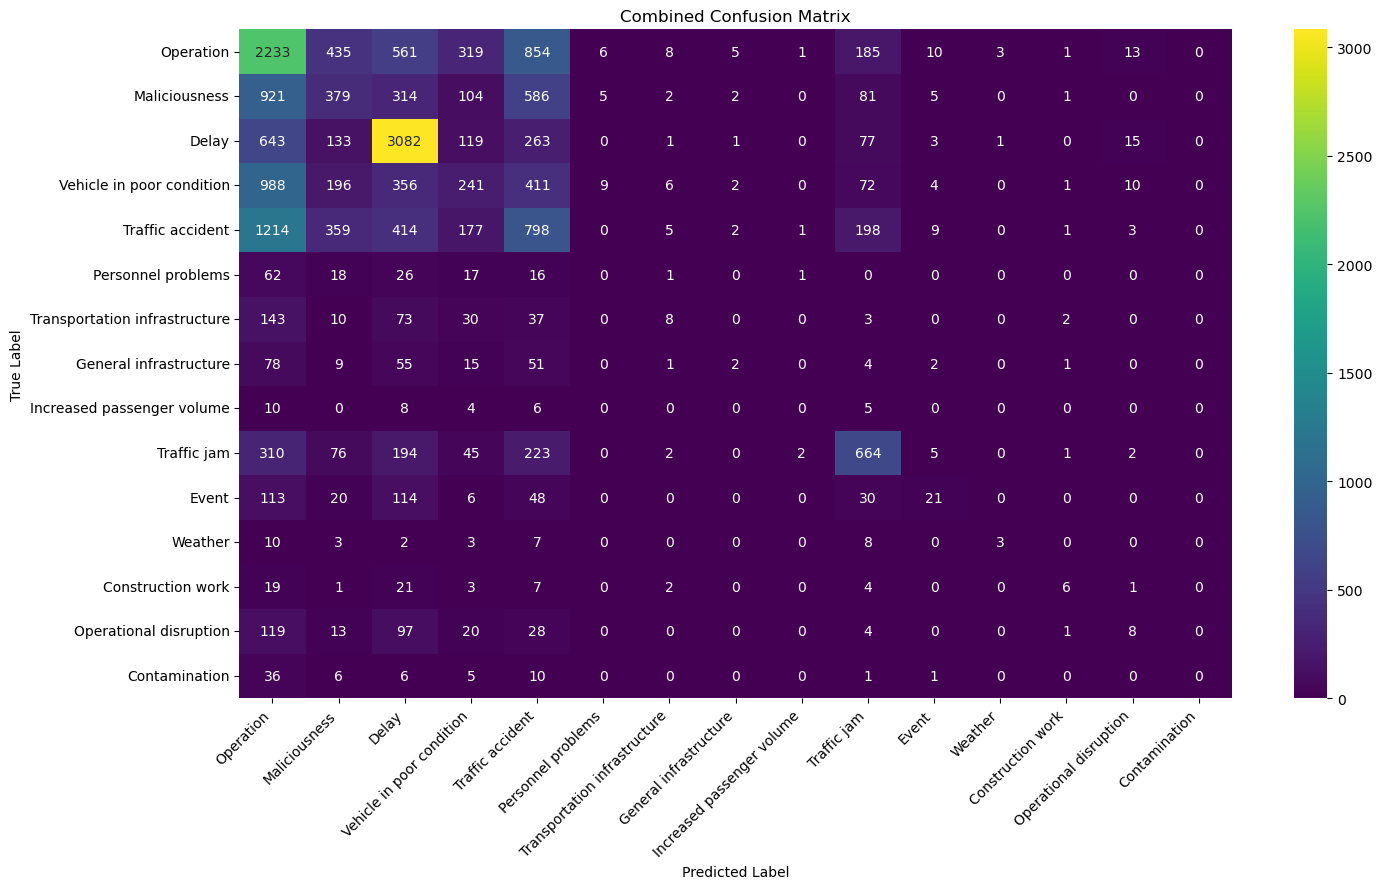

In [69]:
#
# <<< INSERT CODE HERE >>>
#

# Plot the confusion matrix that was generated in the cell before in a nice format. Each class should have its own representation.

from sklearn.metrics import confusion_matrix

labels = data_processed["disruption"].unique()

cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(15, 9))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=labels, yticklabels=labels)
plt.title("Combined Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Task 8: Test model on unknown data (5 Points)

Use the test data created in Section 7.1 and predict traffic disruptions for this data using the best model you found on the training data.

In [70]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13252 entries, (2023, 2, 9) to (2017, 1, 14)
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp_dailyMin     13252 non-null  float64
 1   temp_dailyMax     13252 non-null  float64
 2   temp_dailyMean    13252 non-null  float64
 3   temp_dailyMedian  13252 non-null  float64
 4   hum_dailyMin      13252 non-null  int64  
 5   hum_dailyMax      13252 non-null  int64  
 6   hum_dailyMean     13252 non-null  float64
 7   wind_dailyMin     13252 non-null  int64  
 8   wind_dailyMax     13252 non-null  int64  
 9   wind_dailyMean    13252 non-null  float64
 10  precip            13252 non-null  float64
 11  bus               13252 non-null  bool   
 12  subway            13252 non-null  bool   
 13  tram              13252 non-null  bool   
 14  duration          13252 non-null  float64
 15  class             13252 non-null  object 
dtypes: bool(3), float64(8

In [71]:
disruption_types = data_processed['class'].unique()
disruption_types

array(['Operation', 'Maliciousness', 'Delay', 'Vehicle in poor condition',
       'Traffic accident', 'Personnel problems',
       'Transportation infrastructure', 'General infrastructure',
       'Increased passenger volume', 'Traffic jam', 'Event', 'Weather',
       'Construction work', 'Operational disruption', 'Contamination'],
      dtype=object)

### 8.1 Train & predict with best model

Set your best model

In [72]:
# 
# <<< INSERT CODE HERE >>>
# 

def create_best_model(random_state=42):
    from sklearn.pipeline import Pipeline
    from sklearn.feature_selection import VarianceThreshold

    pipeline = Pipeline([("feature_selection", VarianceThreshold()), ("scaler", StandardScaler()), ("classifier", RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=random_state))])

    return pipeline


best_model = create_best_model()

In [73]:
assert isinstance(best_model, sklearn.pipeline.Pipeline) or isinstance(best_model,tuple(all_methods))

In [74]:
# 
# <<< INSERT CODE HERE >>>
# 

def train_and_predict(best_model, train_data: pd.DataFrame, test_data: pd.DataFrame):
    X_train = train_data.drop("class", axis=1)
    y_train = train_data["class"]

    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)

    best_model.fit(X_train, y_train_encoded)

    predictions_encoded = best_model.predict(test_data)

    predictions = label_encoder.inverse_transform(predictions_encoded)

    return predictions

In [75]:
# train with train data, predict on hidden test data. For hidden test data, we do not provide the weekly_infections values, of course!
unknown_prediction = train_and_predict(best_model, data_train, data_test.drop('class', axis=1)) 

In [76]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!

In [77]:
disruption_preds = np.unique(unknown_prediction)
disruption_preds

array(['Construction work', 'Contamination', 'Delay', 'Event',
       'General infrastructure', 'Increased passenger volume',
       'Maliciousness', 'Operation', 'Operational disruption',
       'Personnel problems', 'Traffic accident', 'Traffic jam',
       'Transportation infrastructure', 'Vehicle in poor condition',
       'Weather'], dtype=object)

In [78]:
assert len(unknown_prediction.shape) == 1, "Predictions should only have 1 column!"
assert unknown_prediction.shape[0] == data_test.shape[0], "Predictions should have the same number of columns as test data!"

In [79]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!



### 8.2 Visualize Results

* Present the model performance on the test dataset by using one or more metrics from Section 7.3. 
* Use two meaningful representations for the results, e.g. classification report and confusion matrix.

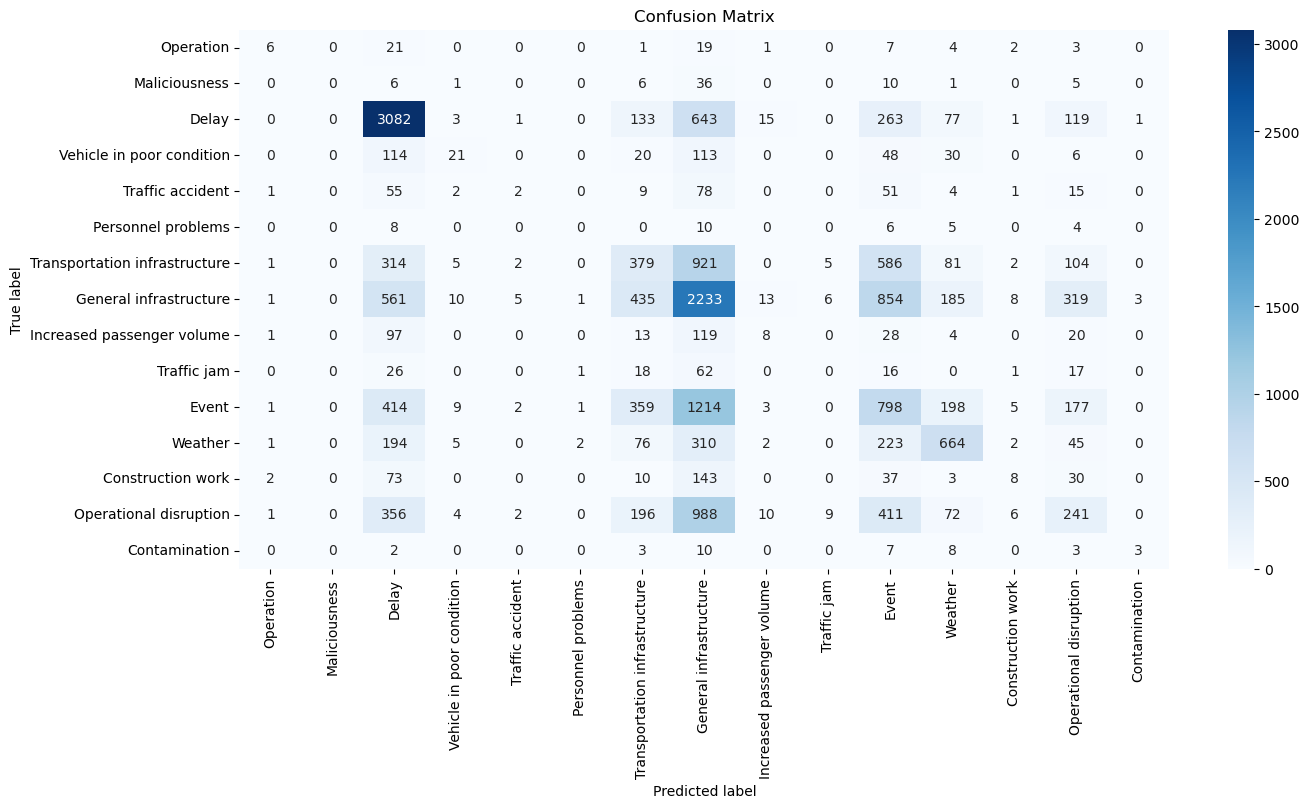

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


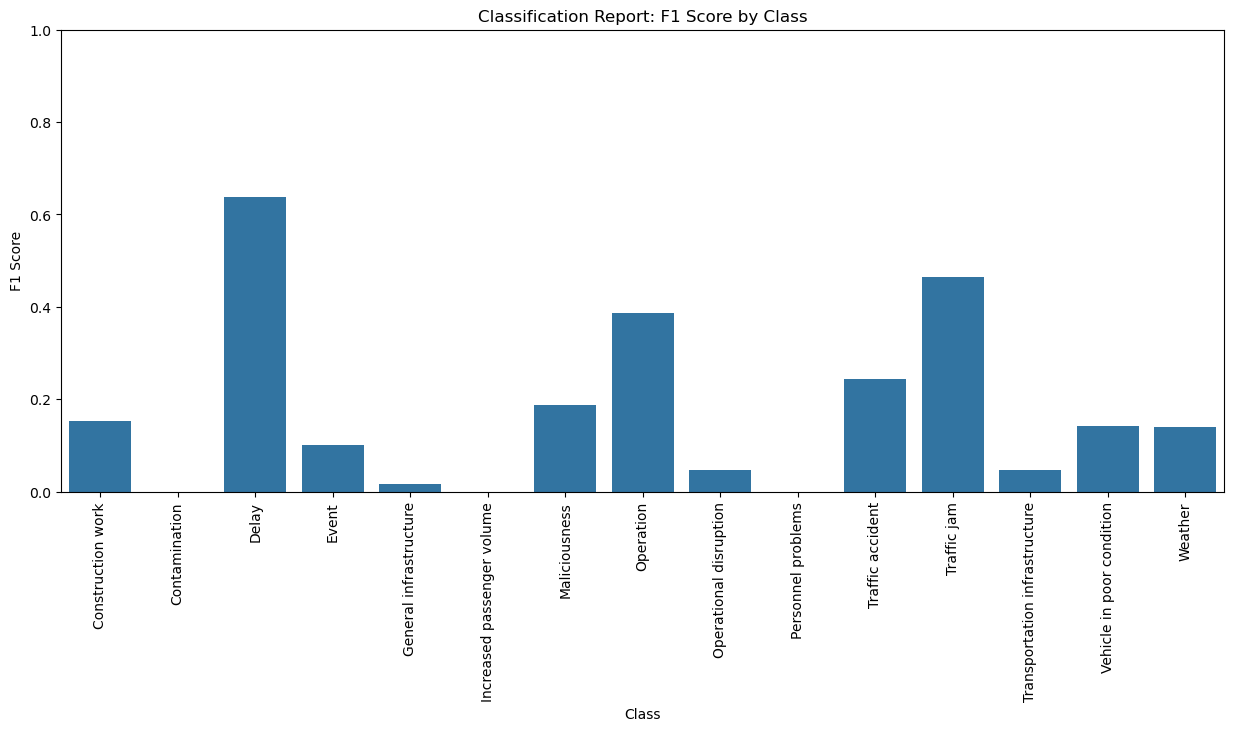

In [80]:
#
# <<< INSERT CODE HERE >>>
#


def plot_confusion_matrix(y_true, y_pred, classes):
    plt.figure(figsize=(15, 7))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")
    plt.show()


def plot_classification_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    class_metrics = report_df.iloc[:-3]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=class_metrics.index, y=class_metrics["f1-score"])
    plt.title("Classification Report: F1 Score by Class")
    plt.xlabel("Class")
    plt.ylabel("F1 Score")
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    plt.show()


plot_confusion_matrix(y_true, y_pred, disruption_types)
plot_classification_metrics(y_true, y_pred)

In [81]:
# hidden tests, DO NOT MODIFY OR COPY THIS CELL!!